In [1]:
import pyspark as ps
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time

In [2]:
spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("df case study") \
            .getOrCreate()
sc = spark.sparkContext

In [3]:
results_df = spark.read.csv('data/2019-Ironman-World-Championship-Results.csv',
                            header=True,
                            quote='"',
                            sep=',',
                            inferSchema=True)

In [4]:
results_df.createOrReplaceTempView('df')

In [5]:
results_df.printSchema()
results_df.columns

root
 |-- BIB: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Division: string (nullable = true)
 |-- Swim: string (nullable = true)
 |-- Bike: string (nullable = true)
 |-- Run: string (nullable = true)
 |-- Overall: string (nullable = true)
 |-- Division Rank: string (nullable = true)
 |-- Gender Rank: string (nullable = true)
 |-- Overall Rank: string (nullable = true)
 |-- T1: string (nullable = true)
 |-- T2: string (nullable = true)



['BIB',
 'Name',
 'Country',
 'Gender',
 'Division',
 'Swim',
 'Bike',
 'Run',
 'Overall',
 'Division Rank',
 'Gender Rank',
 'Overall Rank',
 'T1',
 'T2']

In [6]:
df = results_df.toPandas()
df.drop(['BIB'],axis=1,inplace=True)

In [7]:
# Convert None in Swim, Bike, Run, Overall, T1, and T2 to datetime
# These need to be converted to time intervals NOT datetime (<- time stamp)
# pd.to_timedelta
cols_to_clean = ['Swim', 'Bike', 'Run', 'Overall', 'T1', 'T2']
df[cols_to_clean] = df[cols_to_clean].apply(pd.to_timedelta, unit='s')
df.dtypes

Name                      object
Country                   object
Gender                    object
Division                  object
Swim             timedelta64[ns]
Bike             timedelta64[ns]
Run              timedelta64[ns]
Overall          timedelta64[ns]
Division Rank             object
Gender Rank               object
Overall Rank              object
T1               timedelta64[ns]
T2               timedelta64[ns]
dtype: object

In [8]:
# Convert DNS & DNF to 0
df.loc[df['Division Rank'] == 'DNS', 'Division Rank'] = 0
df.loc[df['Division Rank'] == 'DNF', 'Division Rank'] = 0
df.loc[df['Division Rank'] == 'DQ', 'Division Rank'] = 0
df['Division Rank'] = df['Division Rank'].astype(int)

df

,Name,Country,Gender,Division,Swim,Bike,Run,Overall,Division Rank,Gender Rank,Overall Rank,T1,T2
0,"Frodeno, Jan",DEU,Male,MPRO,00:47:31,04:16:02,02:42:43,07:51:13,1,1,1,00:01:58,00:02:59
1,"O'donnell, Tim",USA,Male,MPRO,00:47:38,04:18:11,02:49:45,07:59:41,2,2,2,00:02:01,00:02:06
2,"Kienle, Sebastian",DEU,Male,MPRO,00:52:17,04:15:04,02:49:56,08:02:04,3,3,3,00:02:12,00:02:35
3,"Hoffman, Ben",USA,Male,MPRO,00:51:01,04:24:01,02:43:08,08:02:52,4,4,4,00:02:25,00:02:17
4,"Wurf, Cameron",AUS,Male,MPRO,00:52:25,04:14:44,02:55:03,08:06:41,5,5,5,00:02:07,00:02:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,"Sudut, Martin",USA,Male,M65-69,NaT,NaT,NaT,NaT,0,DNS,DNS,NaT,NaT
2430,"Bourdillon, Patrick",USA,Male,M70-74,NaT,NaT,NaT,NaT,0,DNS,DNS,NaT,NaT
2431,"Evenson, Even",USA,Male,M70-74,NaT,NaT,NaT,NaT,0,DNS,DNS,NaT,NaT
2432,"Cooper, D. Mark",USA,Male,M75-79,NaT,NaT,NaT,NaT,0,DNS,DNS,NaT,NaT


In [9]:
male_results = df[df['Gender'] == 'Male']
male_pro = male_results[male_results['Division'] == 'MPRO']
male_agegroups = male_results[male_results['Division'] != 'MPRO']
'''
male_F18 = male_results[male_results['Division'] == 'M18-24']
male_F25 = male_results[male_results['Division'] == 'M25-29']
male_F30 = male_results[male_results['Division'] == 'M30-34']
male_F35 = male_results[male_results['Division'] == 'M35-39']
male_F40 = male_results[male_results['Division'] == 'M40-44']
male_F45 = male_results[male_results['Division'] == 'M45-49']
male_F50 = male_results[male_results['Division'] == 'M50-54']
male_F55 = male_results[male_results['Division'] == 'M55-59']
male_F60 = male_results[male_results['Division'] == 'M60-64']
male_F65 = male_results[male_results['Division'] == 'M66-69']
male_F70 = male_results[male_results['Division'] == 'M70-74']
male_F75 = male_results[male_results['Division'] == 'M75-79']
male_F80 = male_results[male_results['Division'] == 'M80-84']'''

"\nmale_F18 = male_results[male_results['Division'] == 'M18-24']\nmale_F25 = male_results[male_results['Division'] == 'M25-29']\nmale_F30 = male_results[male_results['Division'] == 'M30-34']\nmale_F35 = male_results[male_results['Division'] == 'M35-39']\nmale_F40 = male_results[male_results['Division'] == 'M40-44']\nmale_F45 = male_results[male_results['Division'] == 'M45-49']\nmale_F50 = male_results[male_results['Division'] == 'M50-54']\nmale_F55 = male_results[male_results['Division'] == 'M55-59']\nmale_F60 = male_results[male_results['Division'] == 'M60-64']\nmale_F65 = male_results[male_results['Division'] == 'M66-69']\nmale_F70 = male_results[male_results['Division'] == 'M70-74']\nmale_F75 = male_results[male_results['Division'] == 'M75-79']\nmale_F80 = male_results[male_results['Division'] == 'M80-84']"

In [10]:
fem_results = df[df['Gender'] == 'Female']
fem_pro = fem_results[fem_results['Division'] == 'FPRO']
fem_agegroups = fem_results[fem_results['Division'] != 'FPRO']
'''
fem_F18 = fem_results[fem_results['Division'] == 'F18-24']
fem_F25 = fem_results[fem_results['Division'] == 'F25-29']
fem_F30 = fem_results[fem_results['Division'] == 'F30-34']
fem_F35 = fem_results[fem_results['Division'] == 'F35-39']
fem_F40 = fem_results[fem_results['Division'] == 'F40-44']
fem_F45 = fem_results[fem_results['Division'] == 'F45-49']
fem_F50 = fem_results[fem_results['Division'] == 'F50-54']
fem_F55 = fem_results[fem_results['Division'] == 'F55-59']
fem_F60 = fem_results[fem_results['Division'] == 'F60-64']
fem_F65 = fem_results[fem_results['Division'] == 'F66-69']
fem_F70 = fem_results[fem_results['Division'] == 'F70-74']'''

"\nfem_F18 = fem_results[fem_results['Division'] == 'F18-24']\nfem_F25 = fem_results[fem_results['Division'] == 'F25-29']\nfem_F30 = fem_results[fem_results['Division'] == 'F30-34']\nfem_F35 = fem_results[fem_results['Division'] == 'F35-39']\nfem_F40 = fem_results[fem_results['Division'] == 'F40-44']\nfem_F45 = fem_results[fem_results['Division'] == 'F45-49']\nfem_F50 = fem_results[fem_results['Division'] == 'F50-54']\nfem_F55 = fem_results[fem_results['Division'] == 'F55-59']\nfem_F60 = fem_results[fem_results['Division'] == 'F60-64']\nfem_F65 = fem_results[fem_results['Division'] == 'F66-69']\nfem_F70 = fem_results[fem_results['Division'] == 'F70-74']"

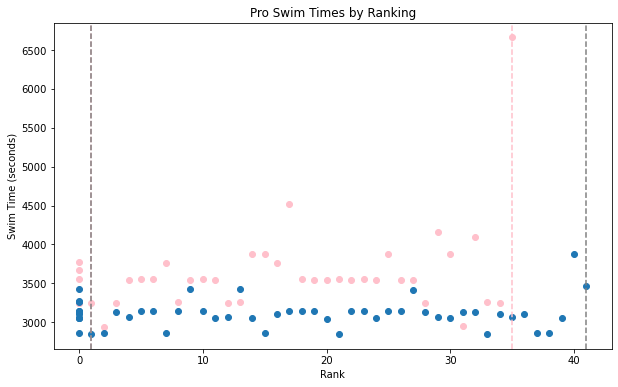

In [11]:
xf = fem_pro['Division Rank']
yf = fem_pro['Swim'].apply(lambda x: x.total_seconds())
xm = male_pro['Division Rank']
ym = male_pro['Swim'].apply(lambda x: x.total_seconds())

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(xf, yf, c='pink')
ax.scatter(xm, ym)

ax.set_title('Pro Swim Times by Ranking')
ax.set_xlabel('Rank')
ax.set_ylabel('Swim Time (seconds)')

ax.axvline(1, c='pink', linestyle="--")
ax.axvline(xf.max(), c='pink', linestyle="--")
ax.axvline(1, c='grey', linestyle="--")
ax.axvline(xm.max(), c='grey', linestyle="--")

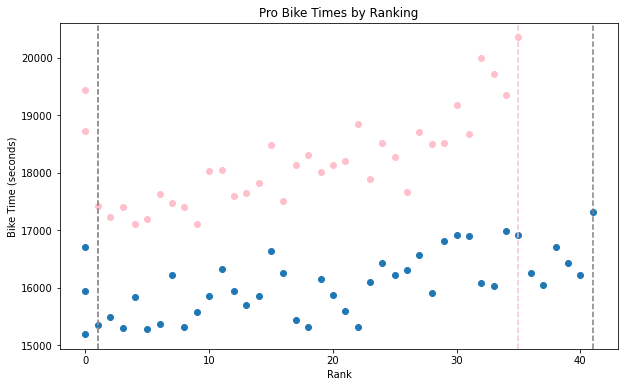

In [12]:
xf = fem_pro['Division Rank']
yf = fem_pro['Bike'].apply(lambda x: x.total_seconds())
xm = male_pro['Division Rank']
ym = male_pro['Bike'].apply(lambda x: x.total_seconds())

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(xf, yf, c='pink')
ax.scatter(xm, ym)

ax.set_title('Pro Bike Times by Ranking')
ax.set_xlabel('Rank')
ax.set_ylabel('Bike Time (seconds)')

ax.axvline(1, c='pink', linestyle="--")
ax.axvline(xf.max(), c='pink', linestyle="--")
ax.axvline(1, c='grey', linestyle="--")
ax.axvline(xm.max(), c='grey', linestyle="--")

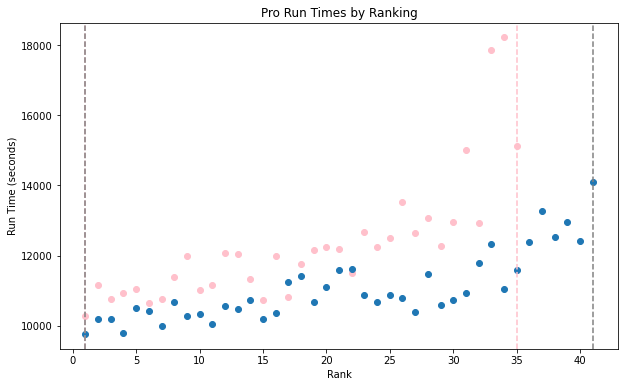

In [13]:
xf = fem_pro['Division Rank']
yf = fem_pro['Run'].apply(lambda x: x.total_seconds())
xm = male_pro['Division Rank']
ym = male_pro['Run'].apply(lambda x: x.total_seconds())

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(xf, yf, c='pink')
ax.scatter(xm, ym)

ax.set_title('Pro Run Times by Ranking')
ax.set_xlabel('Rank')
ax.set_ylabel('Run Time (seconds)')

ax.axvline(1, c='pink', linestyle="--")
ax.axvline(xf.max(), c='pink', linestyle="--")
ax.axvline(1, c='grey', linestyle="--")
ax.axvline(xm.max(), c='grey', linestyle="--")

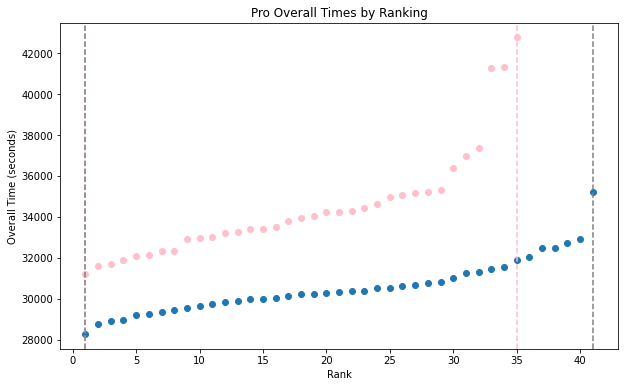

In [14]:
xf = fem_pro['Division Rank']
yf = fem_pro['Overall'].apply(lambda x: x.total_seconds())
xm = male_pro['Division Rank']
ym = male_pro['Overall'].apply(lambda x: x.total_seconds())

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(xf, yf, c='pink')
ax.scatter(xm, ym)

ax.set_title('Pro Overall Times by Ranking')
ax.set_xlabel('Rank')
ax.set_ylabel('Overall Time (seconds)')

ax.axvline(1, c='pink', linestyle="--")
ax.axvline(xf.max(), c='pink', linestyle="--")
ax.axvline(1, c='grey', linestyle="--")
ax.axvline(xm.max(), c='grey', linestyle="--")

## Next steps: what effects do fast Swim, Bike, or Run times have on Overall Ranking?

In [15]:
import seaborn as sns

#covariance = cov(data1, data2)
#sns.heatmap(df_new.corr(), annot = True, fmt='.1g', square=True)

In [30]:
corr_df = df.drop(['Name', 'Gender Rank', 'Country', 'Division'], axis=1)


In [ ]:
ax = sns.heatmap(corr_df, annot=True, square=True)